In [9]:
import numpy as np
import matplotlib.pyplot as plt

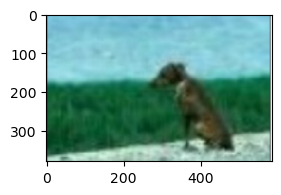

In [10]:
#读取图片
img = plt.imread('D:\机器学习ppt\IMG_20240626_174632.jpg')
row = img.shape[0]
col = img.shape[1]
plt.subplot(121)
plt.imshow(img)

In [11]:
def k_mean(img, iter, k):
    img = img.reshape(-1, 3)
    img = np.column_stack((img, np.ones(row * col)))
    # 1.随机产生初始均值中心
    cluster_center = img[np.random.choice(row * col, k)]
    # 2.分类
    distance = [[] for i in range(k)]
    for i in range(iter):
        #print("迭代次数：", i)
        # 距离计算
        for j in range(k):
            distance[j] = np.sqrt(np.sum((img - cluster_center[j]) ** 2, axis=1))
        # 把距离接近的归为一类
        img[:, 3] = np.argmin(distance, axis=0)
        # 计算新均值中心
        for j in range(k):
            cluster_center[j] = np.mean(img[img[:, 3] == j], axis=0)
    return img[:, 3]

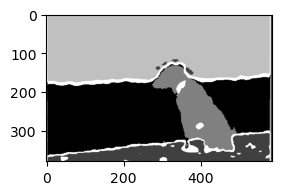

In [12]:
image_show = k_mean(img, 100, 5)
image_show = image_show.reshape(row, col)
plt.subplot(122)
plt.imshow(image_show, cmap='gray')
plt.show()